# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [245]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [246]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=20)
lngs = np.random.uniform(low=-180.000, high=180.000, size=20)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
len(cities)

20

In [247]:
cities

['novoagansk',
 'bredasdorp',
 'sheffield',
 'ushuaia',
 'illoqqortoormiut',
 'ust-tsilma',
 'westport',
 'vestmannaeyjar',
 'faanui',
 'serebryansk',
 'lazaro cardenas',
 'quatre cocos',
 'tamandare',
 'nikolskoye',
 'opuwo',
 'utica',
 'sorland',
 'jalu',
 'chokurdakh',
 'albany']

In [248]:
weather_df = pd.DataFrame({"City":cities, "Cloudiness":'', "Country":countries, "Date":'', "Humidity":'',
                           "Lat":'', "Lng":'', "Max Temp":'', "Wind Speed":''})
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,novoagansk,,RU,,,,,,
1,bredasdorp,,ZA,,,,,,
2,sheffield,,GB,,,,,,
3,ushuaia,,AR,,,,,,
4,illoqqortoormiut,,GL,,,,,,
5,ust-tsilma,,RU,,,,,,
6,westport,,IE,,,,,,
7,vestmannaeyjar,,IS,,,,,,
8,faanui,,PF,,,,,,
9,serebryansk,,KZ,,,,,,


In [249]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='
count = 1
count_set = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [250]:
 print("Begining Data Retrieval \n-----------------------")
    
for index, row in weather_df.iterrows():
    
    query_url = url + row["City"] + ',' + row["Country"] + "&appid=" + weather_api_key 
    
    response = requests.get(query_url)
    response_json = response.json()
    
    try:
        print(f'Processing Record {count} of Set {count_set} | {response_json["name"]}')
        
        weather_df.loc[index, "Cloudiness"] = response_json["clouds"]["all"]
        weather_df.loc[index, "Date"] = response_json["dt"]
        weather_df.loc[index, "Humidity"] = response_json["main"]["humidity"]
        weather_df.loc[index, "Lat"] = response_json["coord"]["lat"]
        weather_df.loc[index, "Lng"] = response_json["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = response_json["main"]["temp_max"]
        weather_df.loc[index, "Wind Speed"] = response_json["wind"]["speed"]
              
        count += 1 
        
    except (KeyError,):
          print("City not found. Skipping....")
    
print("------------------------\n Data Retrieval Complete \n--------------------------")


Begining Data Retrieval 
-----------------------
Processing Record 1 of Set 1 | Novoagansk
Processing Record 2 of Set 1 | Bredasdorp
Processing Record 3 of Set 1 | Sheffield
Processing Record 4 of Set 1 | Ushuaia
City not found. Skipping....
Processing Record 5 of Set 1 | Ust-Tsilma
Processing Record 6 of Set 1 | Westport
Processing Record 7 of Set 1 | Vestmannaeyjar
Processing Record 8 of Set 1 | Faanui
Processing Record 9 of Set 1 | Serebryansk
Processing Record 10 of Set 1 | Ciudad Lazaro Cardenas
Processing Record 11 of Set 1 | Quatre Cocos
Processing Record 12 of Set 1 | Tamandare
Processing Record 13 of Set 1 | Nikolskoye
Processing Record 14 of Set 1 | Opuwo
Processing Record 15 of Set 1 | Utica
Processing Record 16 of Set 1 | Sorland
Processing Record 17 of Set 1 | Jalu
Processing Record 18 of Set 1 | Chokurdakh
Processing Record 19 of Set 1 | Albany
------------------------
 Data Retrieval Complete 
--------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [254]:
# output to csv
weather_df["Max Temp"] = weather_df["Max Temp"].replace('',np.nan)
weather_df.dropna(axis=0, how="any", inplace=True)

weather_df.to_csv("output_data/weather_data.csv")

In [255]:
weather_df.count()

City          19
Cloudiness    19
Country       19
Date          19
Humidity      19
Lat           19
Lng           19
Max Temp      19
Wind Speed    19
dtype: int64

In [256]:
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,novoagansk,100,RU,1580095239,94,61.94,76.66,9.36,13.15
1,bredasdorp,86,ZA,1580095239,71,-34.53,20.04,57.20,3.36
2,sheffield,41,GB,1580095097,93,53.38,-1.47,43.00,8.05
3,ushuaia,75,AR,1580094764,70,-54.8,-68.3,48.20,5.82
5,ust-tsilma,100,RU,1580095261,97,65.44,52.15,-8.18,4.9
6,westport,100,IE,1580095261,79,53.8,-9.52,43.00,7
7,vestmannaeyjar,93,IS,1580095262,86,63.44,-20.27,36.70,31.47
8,faanui,70,PF,1580095262,72,-16.48,-151.75,83.53,10.4
9,serebryansk,75,KZ,1580095262,79,49.69,83.29,23.00,11.18
10,lazaro cardenas,0,MX,1580095262,76,17.96,-102.2,73.27,1.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

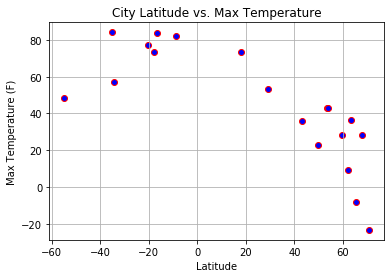

In [257]:
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors="red")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs temp plot.png")
plt.show()

#### Latitude vs. Humidity Plot

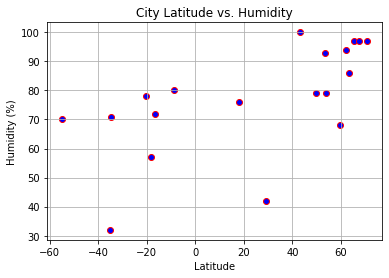

In [258]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker='o',facecolors='blue', edgecolors="red")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs humidity plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

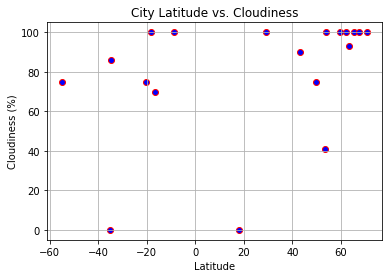

In [259]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker='o',facecolors='blue', edgecolors="red")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs cloudiness plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

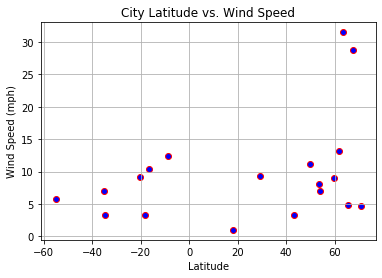

In [260]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker='o',facecolors='blue', edgecolors="red")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs wind speed plot.png")
plt.show()

## Linear Regression

In [288]:
# OPTIONAL: Create a function to create Linear Regression plots

In [291]:
# Create Northern and Southern Hemisphere DataFrames
weather_df['Hemisphere'] = np.where(weather_df['Lat'] >= 0,'Nothern Hemisphere', 'Southern Hemisphere')
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,novoagansk,100,RU,1580095239,94,61.94,76.66,9.36,13.15,Nothern Hemisphere
1,bredasdorp,86,ZA,1580095239,71,-34.53,20.04,57.20,3.36,Southern Hemisphere
2,sheffield,41,GB,1580095097,93,53.38,-1.47,43.00,8.05,Nothern Hemisphere
3,ushuaia,75,AR,1580094764,70,-54.8,-68.3,48.20,5.82,Southern Hemisphere
5,ust-tsilma,100,RU,1580095261,97,65.44,52.15,-8.18,4.9,Nothern Hemisphere
6,westport,100,IE,1580095261,79,53.8,-9.52,43.00,7,Nothern Hemisphere
7,vestmannaeyjar,93,IS,1580095262,86,63.44,-20.27,36.70,31.47,Nothern Hemisphere
8,faanui,70,PF,1580095262,72,-16.48,-151.75,83.53,10.4,Southern Hemisphere
9,serebryansk,75,KZ,1580095262,79,49.69,83.29,23.00,11.18,Nothern Hemisphere
10,lazaro cardenas,0,MX,1580095262,76,17.96,-102.2,73.27,1.01,Nothern Hemisphere


In [292]:
nothern_df = weather_df.loc[weather_df['Hemisphere'] == 'Nothern Hemisphere']
nothern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,novoagansk,100,RU,1580095239,94,61.94,76.66,9.36,13.15,Nothern Hemisphere
2,sheffield,41,GB,1580095097,93,53.38,-1.47,43.00,8.05,Nothern Hemisphere
5,ust-tsilma,100,RU,1580095261,97,65.44,52.15,-8.18,4.9,Nothern Hemisphere
6,westport,100,IE,1580095261,79,53.8,-9.52,43.00,7,Nothern Hemisphere
7,vestmannaeyjar,93,IS,1580095262,86,63.44,-20.27,36.70,31.47,Nothern Hemisphere
9,serebryansk,75,KZ,1580095262,79,49.69,83.29,23.00,11.18,Nothern Hemisphere
10,lazaro cardenas,0,MX,1580095262,76,17.96,-102.2,73.27,1.01,Nothern Hemisphere
13,nikolskoye,100,RU,1580095250,68,59.7,30.79,28.40,8.95,Nothern Hemisphere
15,utica,90,US,1580095237,100,43.1,-75.23,36.00,3.36,Nothern Hemisphere
16,sorland,100,NO,1580095264,97,67.67,12.69,28.49,28.74,Nothern Hemisphere


In [293]:
southern_df = weather_df.loc[weather_df['Hemisphere'] == 'Southern Hemisphere']
southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
1,bredasdorp,86,ZA,1580095239,71,-34.53,20.04,57.20,3.36,Southern Hemisphere
3,ushuaia,75,AR,1580094764,70,-54.8,-68.3,48.20,5.82,Southern Hemisphere
8,faanui,70,PF,1580095262,72,-16.48,-151.75,83.53,10.4,Southern Hemisphere
11,quatre cocos,75,MU,1580095262,78,-20.21,57.76,77.00,9.17,Southern Hemisphere
12,tamandare,100,BR,1580095263,80,-8.76,-35.1,81.99,12.44,Southern Hemisphere
14,opuwo,100,NA,1580095263,57,-18.06,13.84,73.47,3.24,Southern Hemisphere
19,albany,0,AU,1580095264,32,-35.02,117.89,84.20,6.93,Southern Hemisphere


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


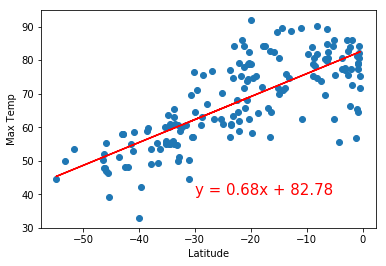

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


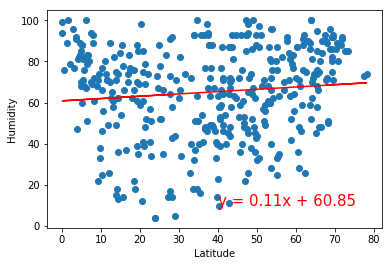

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


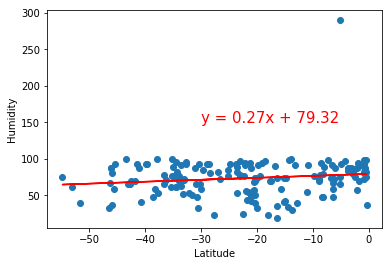

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


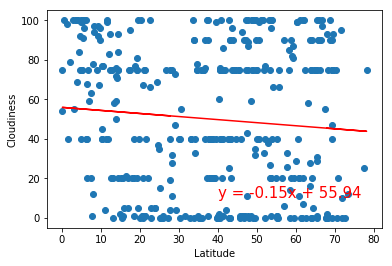

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


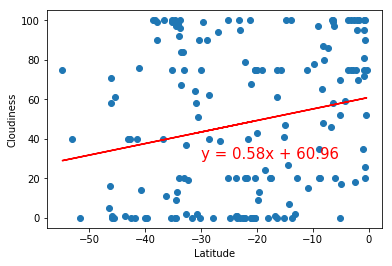

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


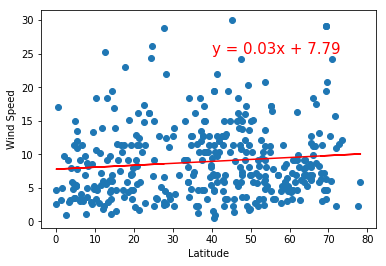

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


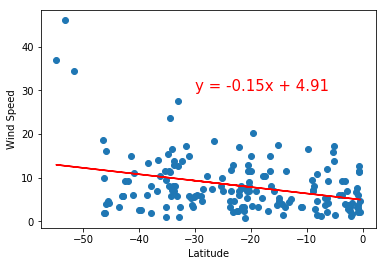